Preprocess data
1. Load dataset, examine structure and stats
2. Check for missing values, outliers, other data quality issues
3. Handle missing values by imputing them using techniques like mean, median, or regressio-based imputation.
4. Perform feautre scaling to ensure that all input features are on a similar scale

In [1]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [37]:
data=pd.read_csv('healthCare_diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
#check for nan values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

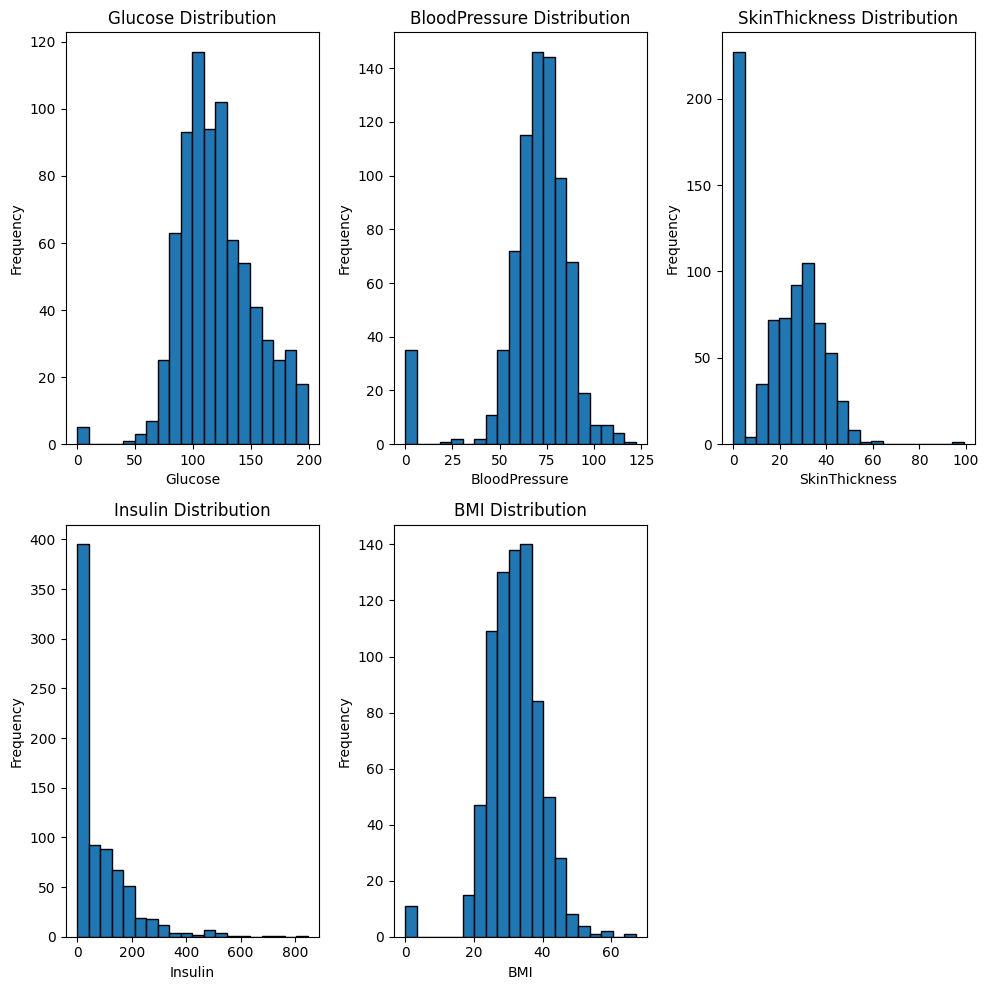

In [47]:
#histogram for each feature
column_names = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

plt.figure(figsize=(10,10))

for i, column in enumerate(column_names):
    plt.subplot(2,3, i+1) #2 rows, 3 columns, i+1 plots
    plt.hist(data[column], bins=20, edgecolor="black")
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
plt.tight_layout()
plt.show()

In [39]:
#check that Glucose, Blood Pressure, SkinThickness, Insulin, and BMI are not 0
column_names={"Glucose","BloodPressure","SkinThickness","Insulin","BMI"}
zero_counts = {}

for column in column_names:
    zero_counts[column] = (data[column] == 0).sum()
print(zero_counts)

{'BMI': 11, 'Insulin': 374, 'Glucose': 5, 'SkinThickness': 227, 'BloodPressure': 35}


<function matplotlib.pyplot.show(close=None, block=None)>

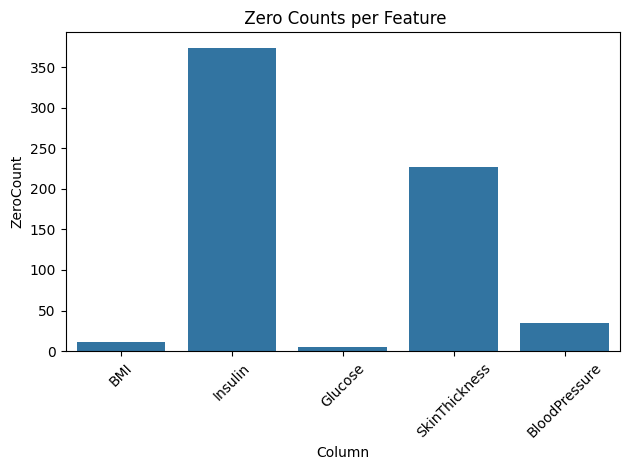

In [40]:
zero_df = pd.DataFrame(list(zero_counts.items()), columns=["Column", "ZeroCount"])

sns.barplot(data=zero_df, x="Column", y="ZeroCount")
plt.title(" Zero Counts per Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

Glucose, Blood Pressure, SkinThickness, Insulin, and BMI 
have some 0's so change to the mean values for each.

In [48]:
#get rid of 0's for those columns and replace with mean
for column in column_names:
    data[column].replace(to_replace = 0, value = data[column].mean(), inplace=True)

zero_counts = {}
for column in column_names:
    zero_counts[column] = (data[column] == 0).sum()

print(zero_counts)

{'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}


C:\Users\sebas\AppData\Local\Temp\ipykernel_6152\906969221.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].replace(to_replace = 0, value = data[column].mean(), inplace=True)


In [49]:
#data split
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [51]:
#make model
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(8,)))
model.add(Dense(1, activation="sigmoid"))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

#evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Model - Accuracy: ", accuracy)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5666 - loss: 0.7012
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 0.6952 
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6247 - loss: 0.6944 
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6238 - loss: 0.6909 
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6423 - loss: 0.6843 
Baseline Model - Accuracy:  0.6558441519737244


Epoch 1/20


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6189 - loss: 1.9137
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5565 - loss: 1.1079 
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6307 - loss: 0.8501
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5414 - loss: 0.8934 
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6492 - loss: 0.7438
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6409 - loss: 0.7405 
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6307 - loss: 0.7725 
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6959 - loss: 0.6217 
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6600 - loss: 0.6808 
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - loss: 0.6448 
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - loss: 0.6629 
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7077 - loss:

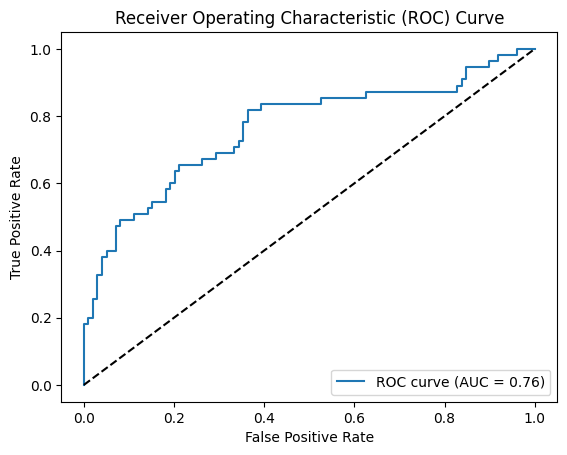

In [57]:
#Variation 1, more hidden layers
model_variation1 = Sequential()
model_variation1.add(Dense(32, activation="relu", input_shape=(8,)))
model_variation1.add(Dense(16, activation="relu"))
model_variation1.add(Dense(1, activation="sigmoid"))
model_variation1.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])
model_variation1.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

#evaluate
loss, accuracy = model_variation1.evaluate(X_test, y_test, verbose=0)
print("Model Variation 1 - accuracy: ", accuracy)

y_pred = model_variation1.predict(X_test)
y_pred_prob = np.squeeze(y_pred) #remove dimensions of size 1

#generate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)

#plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1], 'k--') #Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()